In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Processed_data.csv')

In [3]:
data=data.drop(columns='Unnamed: 0')

In [4]:
data.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,...,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99
0,3,0.000,72.0,72.000000,26.0,10.0,6,10.0,16,0,...,0.011294,-0.023450,0.009454,-0.007929,0.000032,-0.007039,-0.011485,0.015448,-0.012006,-0.003866
1,4,1.002,91.8,54.472104,48.0,10.0,22,18.4,6,0,...,0.039491,0.021280,-0.005106,-0.015760,0.016425,0.039872,-0.047719,-0.000016,-0.013681,-0.010934
2,1,0.000,91.0,91.000000,38.0,10.0,20,7.0,16,0,...,0.012038,0.099881,0.019001,0.063796,0.002496,0.006196,0.051213,-0.014346,-0.050256,-0.007663
3,4,1.500,77.0,77.000000,40.0,10.0,10,12.0,91,0,...,0.008458,-0.063279,-0.003959,-0.030436,-0.020446,-0.017096,-0.009632,0.055119,0.063940,0.017744
4,4,0.180,73.0,54.472104,26.0,10.0,10,15.0,91,0,...,-0.047187,0.015230,0.064401,0.005247,-0.016908,-0.042391,0.024430,-0.047003,0.015520,0.032127


In [5]:
data.shape

(256574, 127)

In [6]:
data.size

32584898

Set Feature and Target columns

In [7]:
X=data.drop(columns='Severity')
y=data['Severity']

Import required libraries

In [8]:
!pip install lightgbm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.preprocessing import label_binarize

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# AdaBoost Classifier

In [95]:
adb = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # weak learners
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

In [96]:
adb.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [97]:
adb_pred=adb.predict(X_test)
train_adb_pred=adb.predict(X_train)

In [98]:
print("Accuracy Score onn Test data: ",accuracy_score(y_test,adb_pred))
print("Accuracy Score on Train data: ",accuracy_score(y_train,train_adb_pred))

Accuracy Score onn Test data:  0.8480366364610737
Accuracy Score on Train data:  0.8477874295402394


Classification Report

In [99]:
print(classification_report(y_test, adb_pred))

              precision    recall  f1-score   support

           1       0.88      0.89      0.88     12317
           2       0.78      0.80      0.79     13008
           3       0.81      0.83      0.82     13105
           4       0.93      0.88      0.90     12885

    accuracy                           0.85     51315
   macro avg       0.85      0.85      0.85     51315
weighted avg       0.85      0.85      0.85     51315



In [100]:
adb_pred_prob=adb.predict_proba(X_test)

MACRO & WEIGHTED MULTI-CLASS AUC (OVR)

In [102]:
macro_auc = roc_auc_score(y_test, adb_pred_prob, multi_class='ovr', average='macro')
weighted_auc = roc_auc_score(y_test, adb_pred_prob, multi_class='ovr', average='weighted')

print("Macro AUC     :", (macro_auc)*100)
print("Weighted AUC  :", (weighted_auc)*100)

Macro AUC     : 96.05881384347983
Weighted AUC  : 96.03480970449858


ROC Curve per class

In [103]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

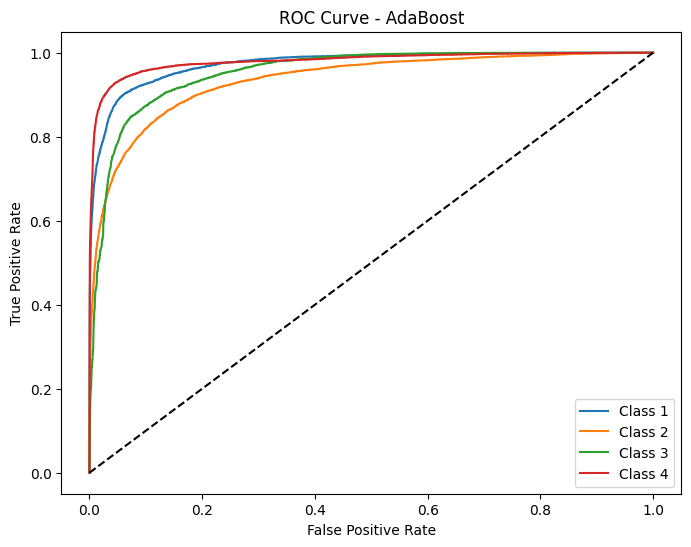

In [104]:

plt.figure(figsize=(8,6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], adb_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Confusion Matrix

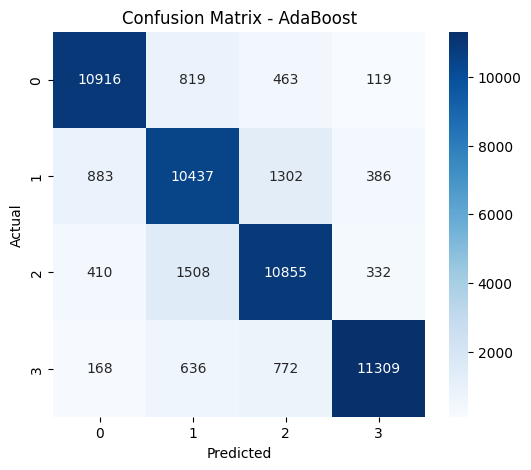

In [105]:
adb_cm = confusion_matrix(y_test, adb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(adb_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# HistGradient Boosting Classifier

In [91]:
hgb = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_iter=300,
    max_leaf_nodes=31,
    random_state=42
)

In [92]:
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.05, max_iter=300,
                               random_state=42)

In [93]:
hgb_pred = hgb.predict(X_test)
train_hgb_pred = hgb.predict(X_train)

In [94]:
print("Accuracy Score onn Test data: ",accuracy_score(y_test,hgb_pred)*100)
print("Accuracy Score on Train data: ",accuracy_score(y_train,train_hgb_pred)*100)

Accuracy Score onn Test data:  91.56776770924681
Accuracy Score on Train data:  94.01828908841999


Classification Report

In [ ]:
print("\n===== HistGradientBoost Classification Report =====")
print(classification_report(y_test, hgb_pred))

In [ ]:
hgb_pred_prob=hgb.predict_proba(X_test)

Macro & Weighted Multi-Class AUC (OVR)

In [ ]:
macro_auc = roc_auc_score(y_test, hgb_pred_prob, multi_class='ovr', average='macro')
weighted_auc = roc_auc_score(y_test, hgb_pred_prob, multi_class='ovr', average='weighted')

print("Macro AUC     :", macro_auc)
print("Weighted AUC  :", weighted_auc)

ROC CURVE FOR EACH CLASS

In [ ]:

plt.figure(figsize=(8,6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], hgb_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

CONFUSION MATRIX

In [ ]:
hgb_cm = confusion_matrix(y_test, hgb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(hgb_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - HistGradientBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# LGBM Classifier

In [79]:
lgb = LGBMClassifier(
    learning_rate=0.03,
    n_estimators=700,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    # min_data_in_leaf = 20,
    colsample_bytree=0.8,
    objective='multiclass',
    num_class=4,
    reg_alpha = 1.0,   # L1 penalty
    reg_lambda = 1.0,  # L2 penalty
    random_state=42
)

In [80]:
lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27172
[LightGBM] [Info] Number of data points in the train set: 205259, number of used features: 126
[LightGBM] [Info] Start training from score -1.427221
[LightGBM] [Info] Start training from score -1.373183
[LightGBM] [Info] Start training from score -1.375050
[LightGBM] [Info] Start training from score -1.370820


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.03, n_estimators=700,
               num_class=4, objective='multiclass', random_state=42,
               reg_alpha=1.0, reg_lambda=1.0, subsample=0.8)

In [81]:
lgb_pred = lgb.predict(X_test)
train_lgb_pred = lgb.predict(X_train)
lgb_pred_prob = lgb.predict_proba(X_test)

Accuracy Score onn Test data:  91.57556270096462
Accuracy Score on Train data:  93.64217890567527

In [82]:
print("Accuracy Score onn Test data: ",accuracy_score(y_test,lgb_pred)*100)
print("Accuracy Score on Train data: ",accuracy_score(y_train,train_lgb_pred)*100)

Accuracy Score onn Test data:  91.71782129981487
Accuracy Score on Train data:  94.22144704982486


In [66]:
print("\n===== LightGBM Classification Report =====")
print(classification_report(y_test, lgb_pred))


===== LightGBM Classification Report =====
              precision    recall  f1-score   support

           1       0.93      0.96      0.94     12317
           2       0.89      0.87      0.88     13008
           3       0.88      0.90      0.89     13105
           4       0.95      0.94      0.94     12885

    accuracy                           0.91     51315
   macro avg       0.91      0.91      0.91     51315
weighted avg       0.91      0.91      0.91     51315



Macro & Weighted Multi-Class AUC (OVR)

In [67]:
macro_auc = roc_auc_score(y_test, lgb_pred_prob, multi_class='ovr', average='macro')
weighted_auc = roc_auc_score(y_test, lgb_pred_prob, multi_class='ovr', average='weighted')

print("Macro AUC     :", (macro_auc)*100)
print("Weighted AUC  :", (weighted_auc)*100)

Macro AUC     : 98.85199663432101
Weighted AUC  : 98.84126783540623


ROC Curve per class

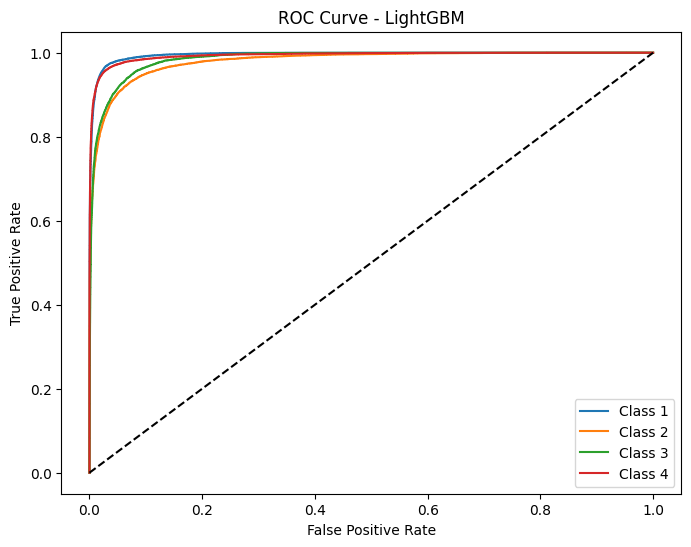

In [68]:
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], lgb_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {classes[i]}")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Confusion Matrix

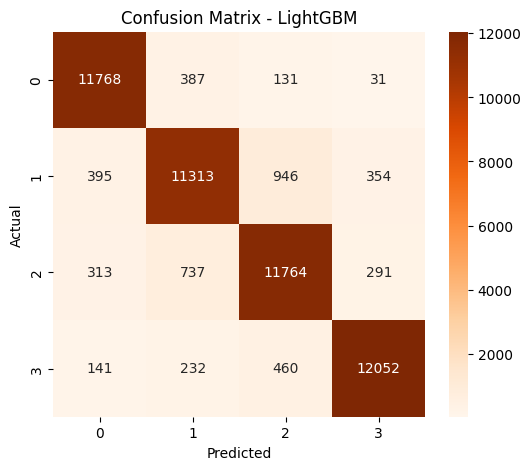

In [69]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()